In [44]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as snes

## Merging all CSV files into a single dataset.

In [45]:
csv_list = ["./spotifysongscsvs/2010.csv", "./spotifysongscsvs/2011.csv", "./spotifysongscsvs/2012.csv", "./spotifysongscsvs/2013.csv", "./spotifysongscsvs/2014.csv", "./spotifysongscsvs/2015.csv", "./spotifysongscsvs/2016.csv", "./spotifysongscsvs/2017.csv", "./spotifysongscsvs/2018.csv", "./spotifysongscsvs/2019.csv"]
all_dataframes = []

for file in csv_list:
    dataframe = pd.read_csv(file)
    all_dataframes.append(dataframe)

all_top_songs = pd.concat(all_dataframes, ignore_index=True)
all_top_songs.head(2)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82


___

## Export the combined dataset into a CSV

In [46]:
all_top_songs.to_csv("./top_spotify_songs.csv", index=False)

___

## Clean the dataset

In [47]:
all_top_songs.info()
# enter shrug emoji here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


___

## What is the most popular song in the dataset?

In [48]:
most_popular_index = all_top_songs["pop"].idxmax()
most_popular_song = all_top_songs.loc[most_popular_index, "title"]
most_popular_song_artist = all_top_songs.loc[most_popular_index, "artist"]
print(f"The most popular song in the dataset is \"{most_popular_song}\" by {most_popular_song_artist}")

The most popular song in the dataset is "Memories" by Maroon 5


___

## What artist has the most songs in the dataset?

In [49]:
artist_counts = all_top_songs["artist"].value_counts()
artist_with_most_songs = artist_counts.idxmax()
num_songs_by_fanciest_pantsiest_artist = artist_counts.max()
print(f"The artist with the most songs in the dataset is {artist_with_most_songs} with {num_songs_by_fanciest_pantsiest_artist} songs.")

The artist with the most songs in the dataset is Katy Perry with 17 songs.


___

## What is the most popular genre of music in the dataset?

In [50]:
genre_counts = all_top_songs["top genre"].value_counts()
most_popular_genre = genre_counts.idxmax()
most_popular_genre_count = genre_counts.max()
print(f"The most popular genre is \"{most_popular_genre}\" with {most_popular_genre_count} songs in the dataset.")

The most popular genre is "dance pop" with 327 songs in the dataset.


___

## Are there any songs in the dataset more than once?

In [51]:
duplicate_songs = all_top_songs[all_top_songs.duplicated(subset="title", keep=False)]
duplicate_song_counts = duplicate_songs["title"].value_counts().reset_index()
duplicate_song_counts

,title,count
0,Just the Way You Are,2
1,Love Yourself,2
2,First Time,2
3,All I Ask,2
4,Here,2
5,Runnin' (Lose It All),2
6,Company,2
7,Stitches,2
8,Sugar,2
9,The Hills,2


___

## Is there a relationship between popularity and danceability?

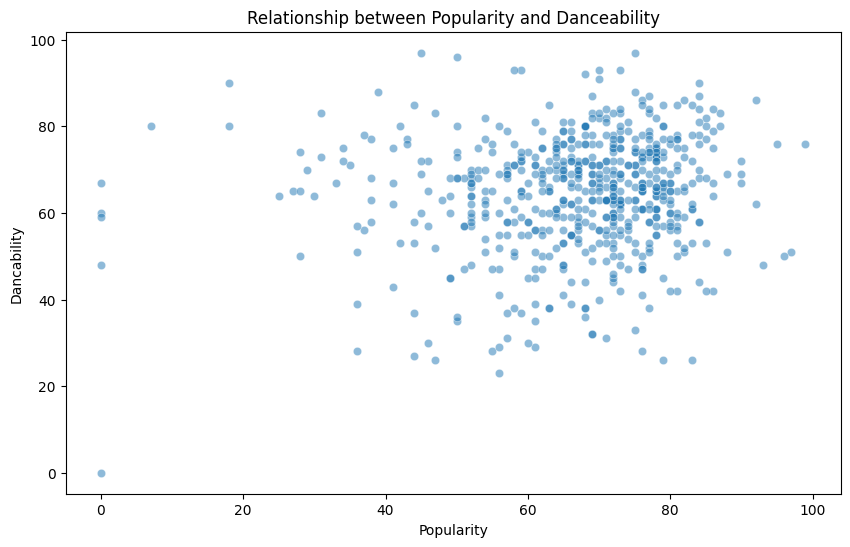

In [54]:
plt.figure(figsize=(10, 6))
snes.scatterplot(x="pop", y="dnce", data=all_top_songs, alpha=0.5)
plt.xlabel("Popularity")
plt.ylabel("Danceability")
plt.title("Relationship between Popularity and Danceability")
plt.show()

Seen in the scatterplot above, there does seem to be a strong correlation between popularity and danceability. 

___

## Does having a higher bpm lead to having a higher energy score?